Importing libraries

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# from yellowbrick.classifier import ConfusionMatrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder

In [61]:
df = pd.read_csv('data/Bank_Customer_Churn.csv', sep = ',')

In [62]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [63]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [65]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [66]:
df.dtypes
# removing geography, customerId, surname, RowNumber

RowNumber               int64
CustomerId              int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

In [67]:
df.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [68]:
df['CustomerId'].nunique()
# no duplicate customer ids in the 10k rows

10000

In [78]:
# removing geography, customerId, surname, RowNumber

columns_to_keep = ['CreditScore',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned']

# Create a new DataFrame with the specified columns
df1 = df[columns_to_keep].copy()

# Display the new DataFrame
df1.head(2)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456


In [79]:
df1 = df1.rename(columns={'EstimatedSalary': 'Salary', 'Tenure': 'YearsWithBank'})

In [80]:
df1['JoinAge'] = df1['Age'] - df1['YearsWithBank']

In [81]:
df1.head(2)

,CreditScore,Gender,Age,YearsWithBank,Balance,NumOfProducts,HasCrCard,IsActiveMember,Salary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,JoinAge
0,619,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464,40
1,608,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456,40


In [82]:
df1.dtypes

CreditScore             int64
Gender                 object
Age                     int64
YearsWithBank           int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
Salary                float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
JoinAge                 int64
dtype: object

In [74]:
# Exploratory Data Analysis

C:\Users\Admin\AppData\Local\Temp\ipykernel_6108\3688917451.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr().round(2)


<Axes: >

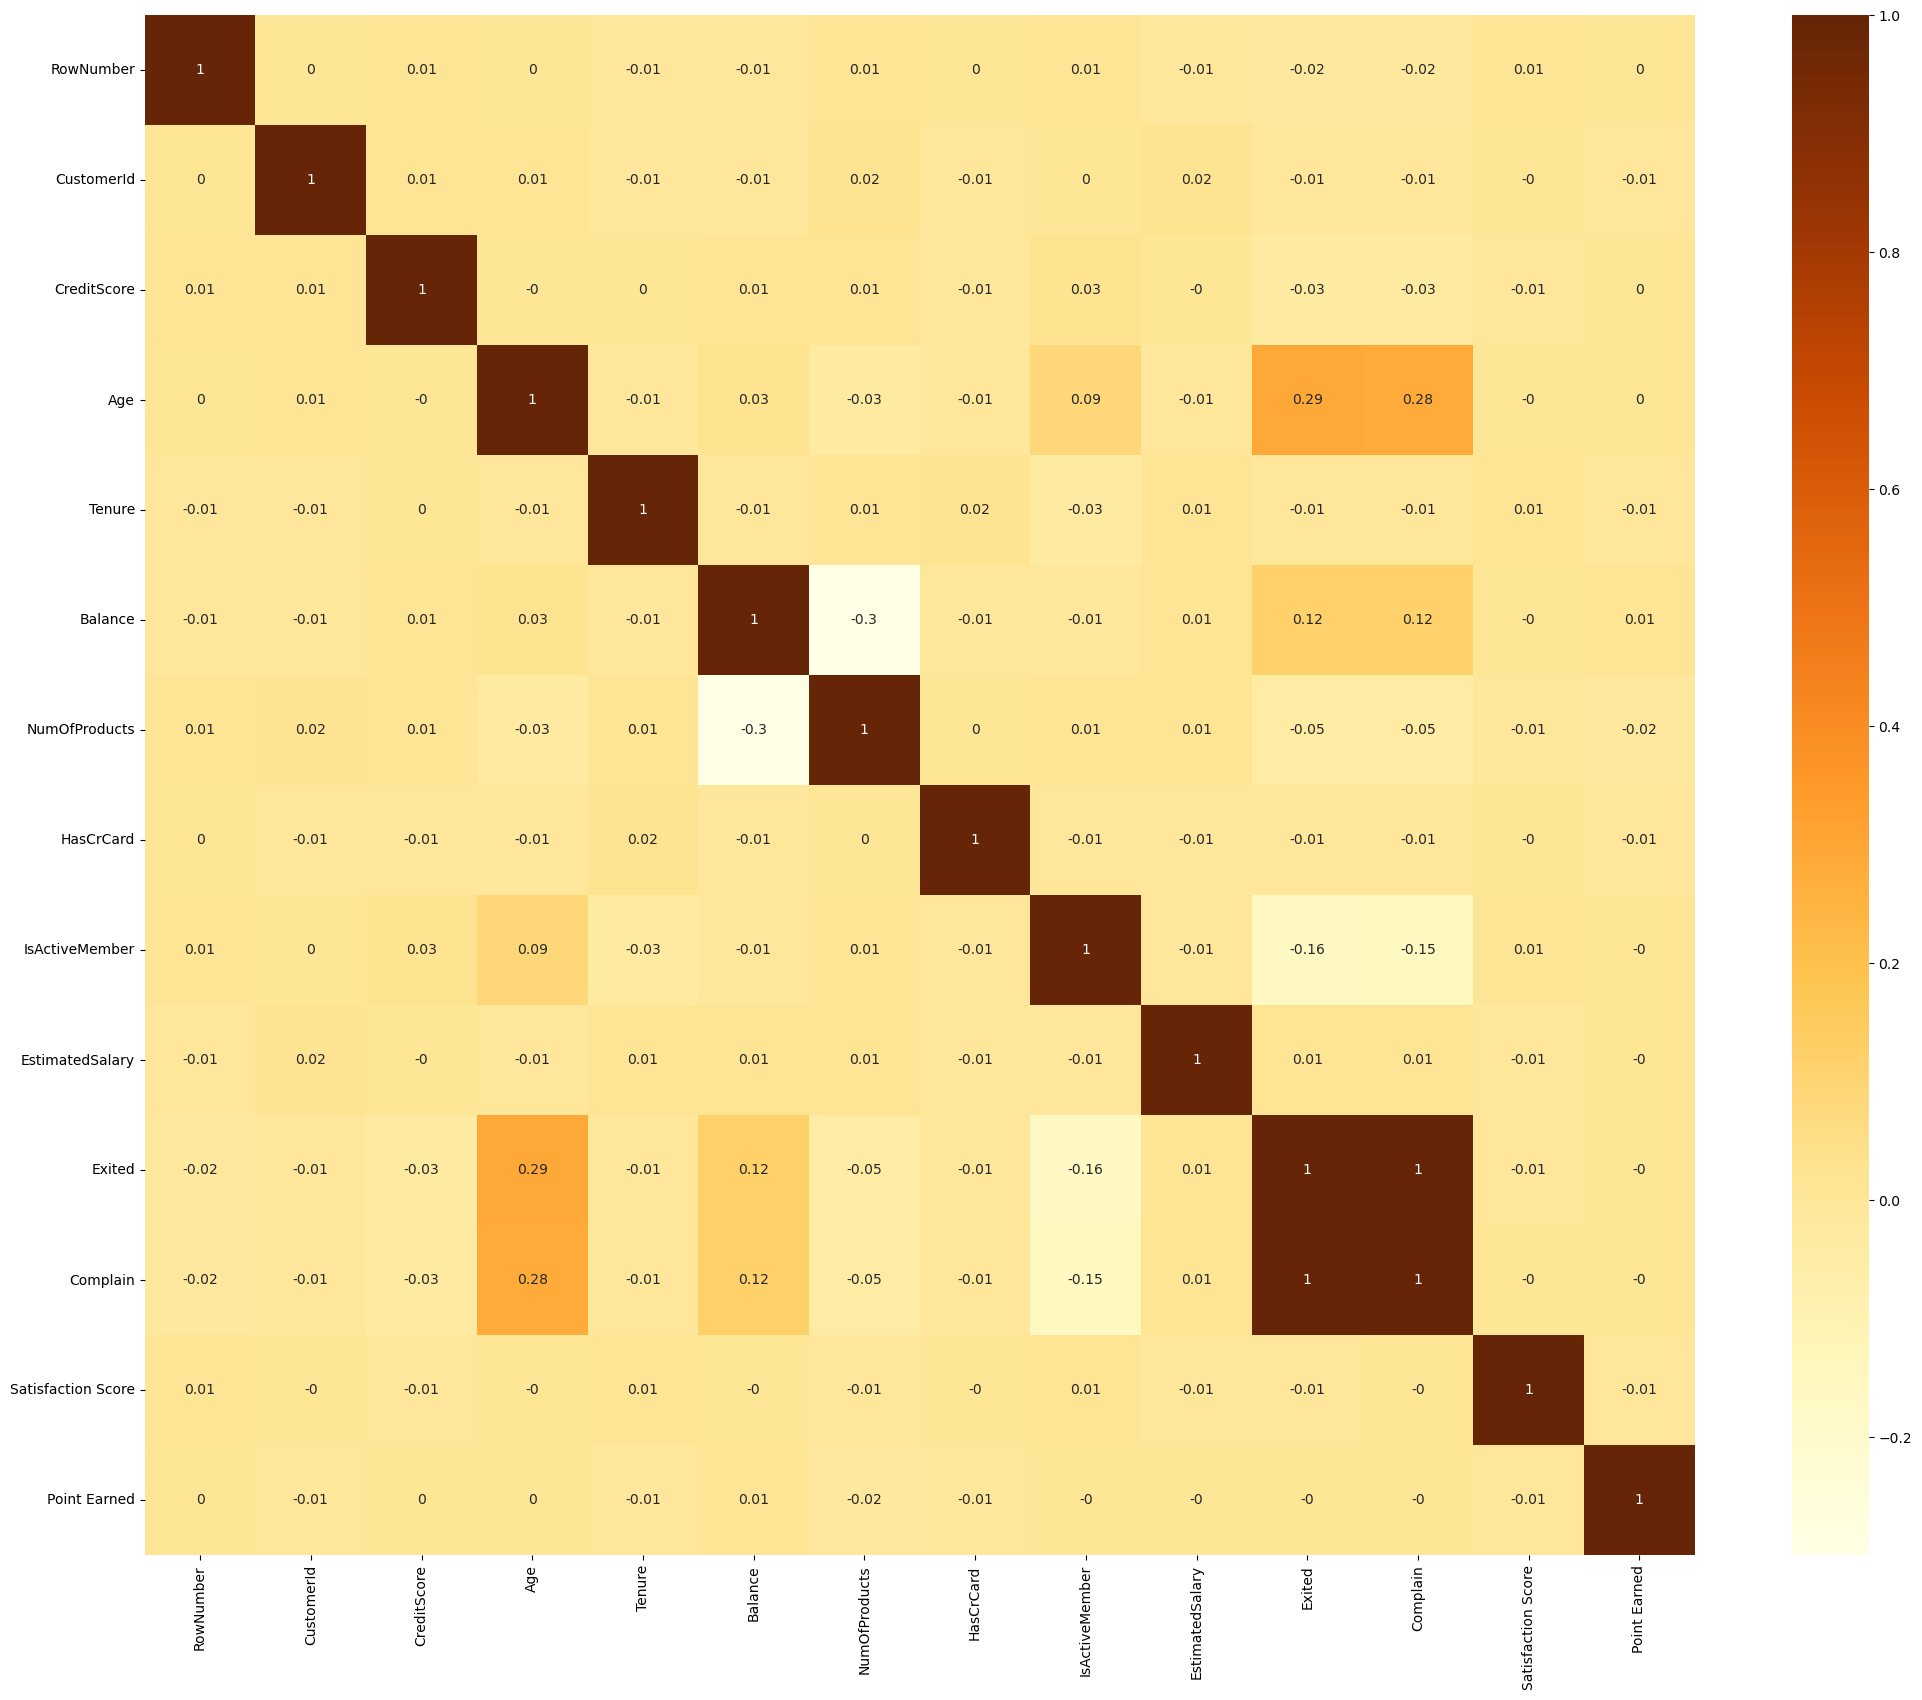

In [75]:
corr = df.corr().round(2)
plt.figure(figsize = (25,20))
sns.heatmap(corr, annot = True, cmap = 'YlOrBr')

In [76]:
# Complaint is 100% correlated with the Target Variable Exit. 
# We don't know when it is logged (before or after exiting) and to prevent overfitting so we will remove it
df1 = df1.drop('Complain', axis = 1)

<Axes: title={'center': 'Variable Card Type'}, xlabel='Card Type', ylabel='count'>

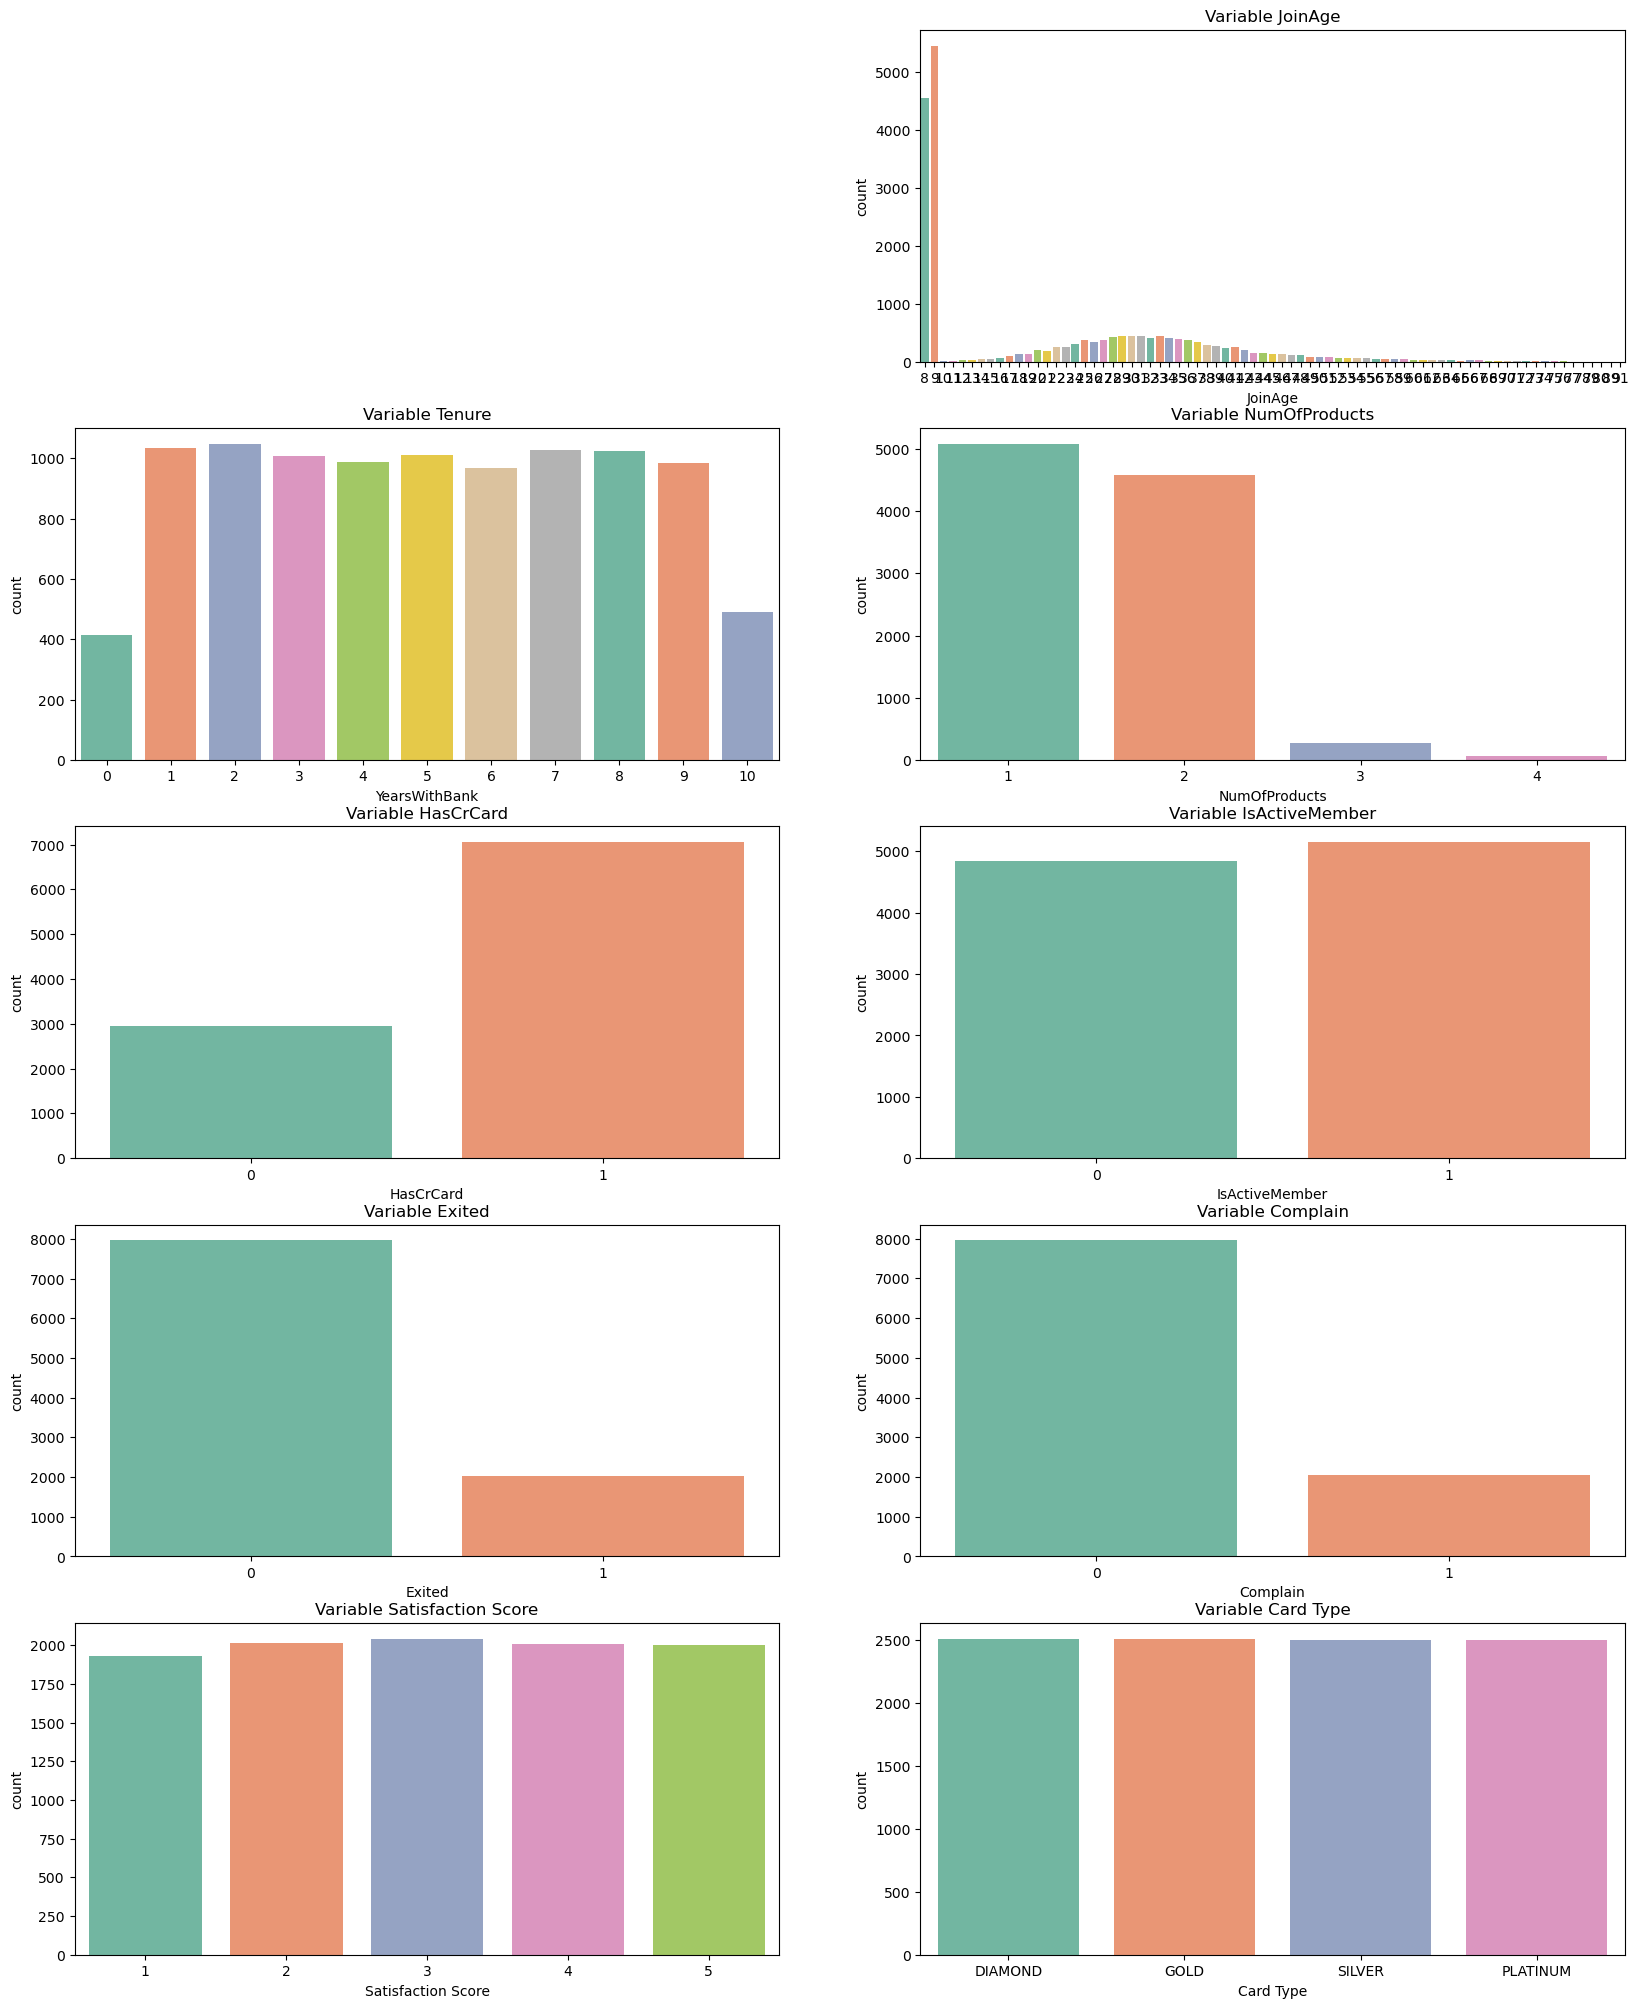

In [92]:
plt.figure(figsize = (20, 25))

# plt.subplot(5, 2, 1)
# plt.gca().set_title('Variable Geography')
# sns.countplot(x = 'Geography', palette = 'Set2', data = df1)

plt.subplot(5, 2, 2)
plt.gca().set_title('Variable Gender')
sns.countplot(x = 'Gender', palette = 'Set2', data = df1)

plt.subplot(5, 2, 2)
plt.gca().set_title('Variable JoinAge')
sns.countplot(x = 'JoinAge', palette = 'Set2', data = df1)

plt.subplot(5, 2, 3)
plt.gca().set_title('Variable Tenure')
sns.countplot(x = 'YearsWithBank', palette = 'Set2', data = df1)

plt.subplot(5, 2, 4)
plt.gca().set_title('Variable NumOfProducts')
sns.countplot(x = 'NumOfProducts', palette = 'Set2', data = df1)

plt.subplot(5, 2, 5)
plt.gca().set_title('Variable HasCrCard')
sns.countplot(x = 'HasCrCard', palette = 'Set2', data = df1)

plt.subplot(5, 2, 6)
plt.gca().set_title('Variable IsActiveMember')
sns.countplot(x = 'IsActiveMember', palette = 'Set2', data = df1)

plt.subplot(5, 2, 7)
plt.gca().set_title('Variable Exited')
sns.countplot(x = 'Exited', palette = 'Set2', data = df1)

plt.subplot(5, 2, 8)
plt.gca().set_title('Variable Complain')
sns.countplot(x = 'Complain', palette = 'Set2', data = df1)

plt.subplot(5, 2, 9)
plt.gca().set_title('Variable Satisfaction Score')
sns.countplot(x = 'Satisfaction Score', palette = 'Set2', data = df1)

plt.subplot(5, 2, 10)
plt.gca().set_title('Variable Card Type')
sns.countplot(x = 'Card Type', palette = 'Set2', data = df1)

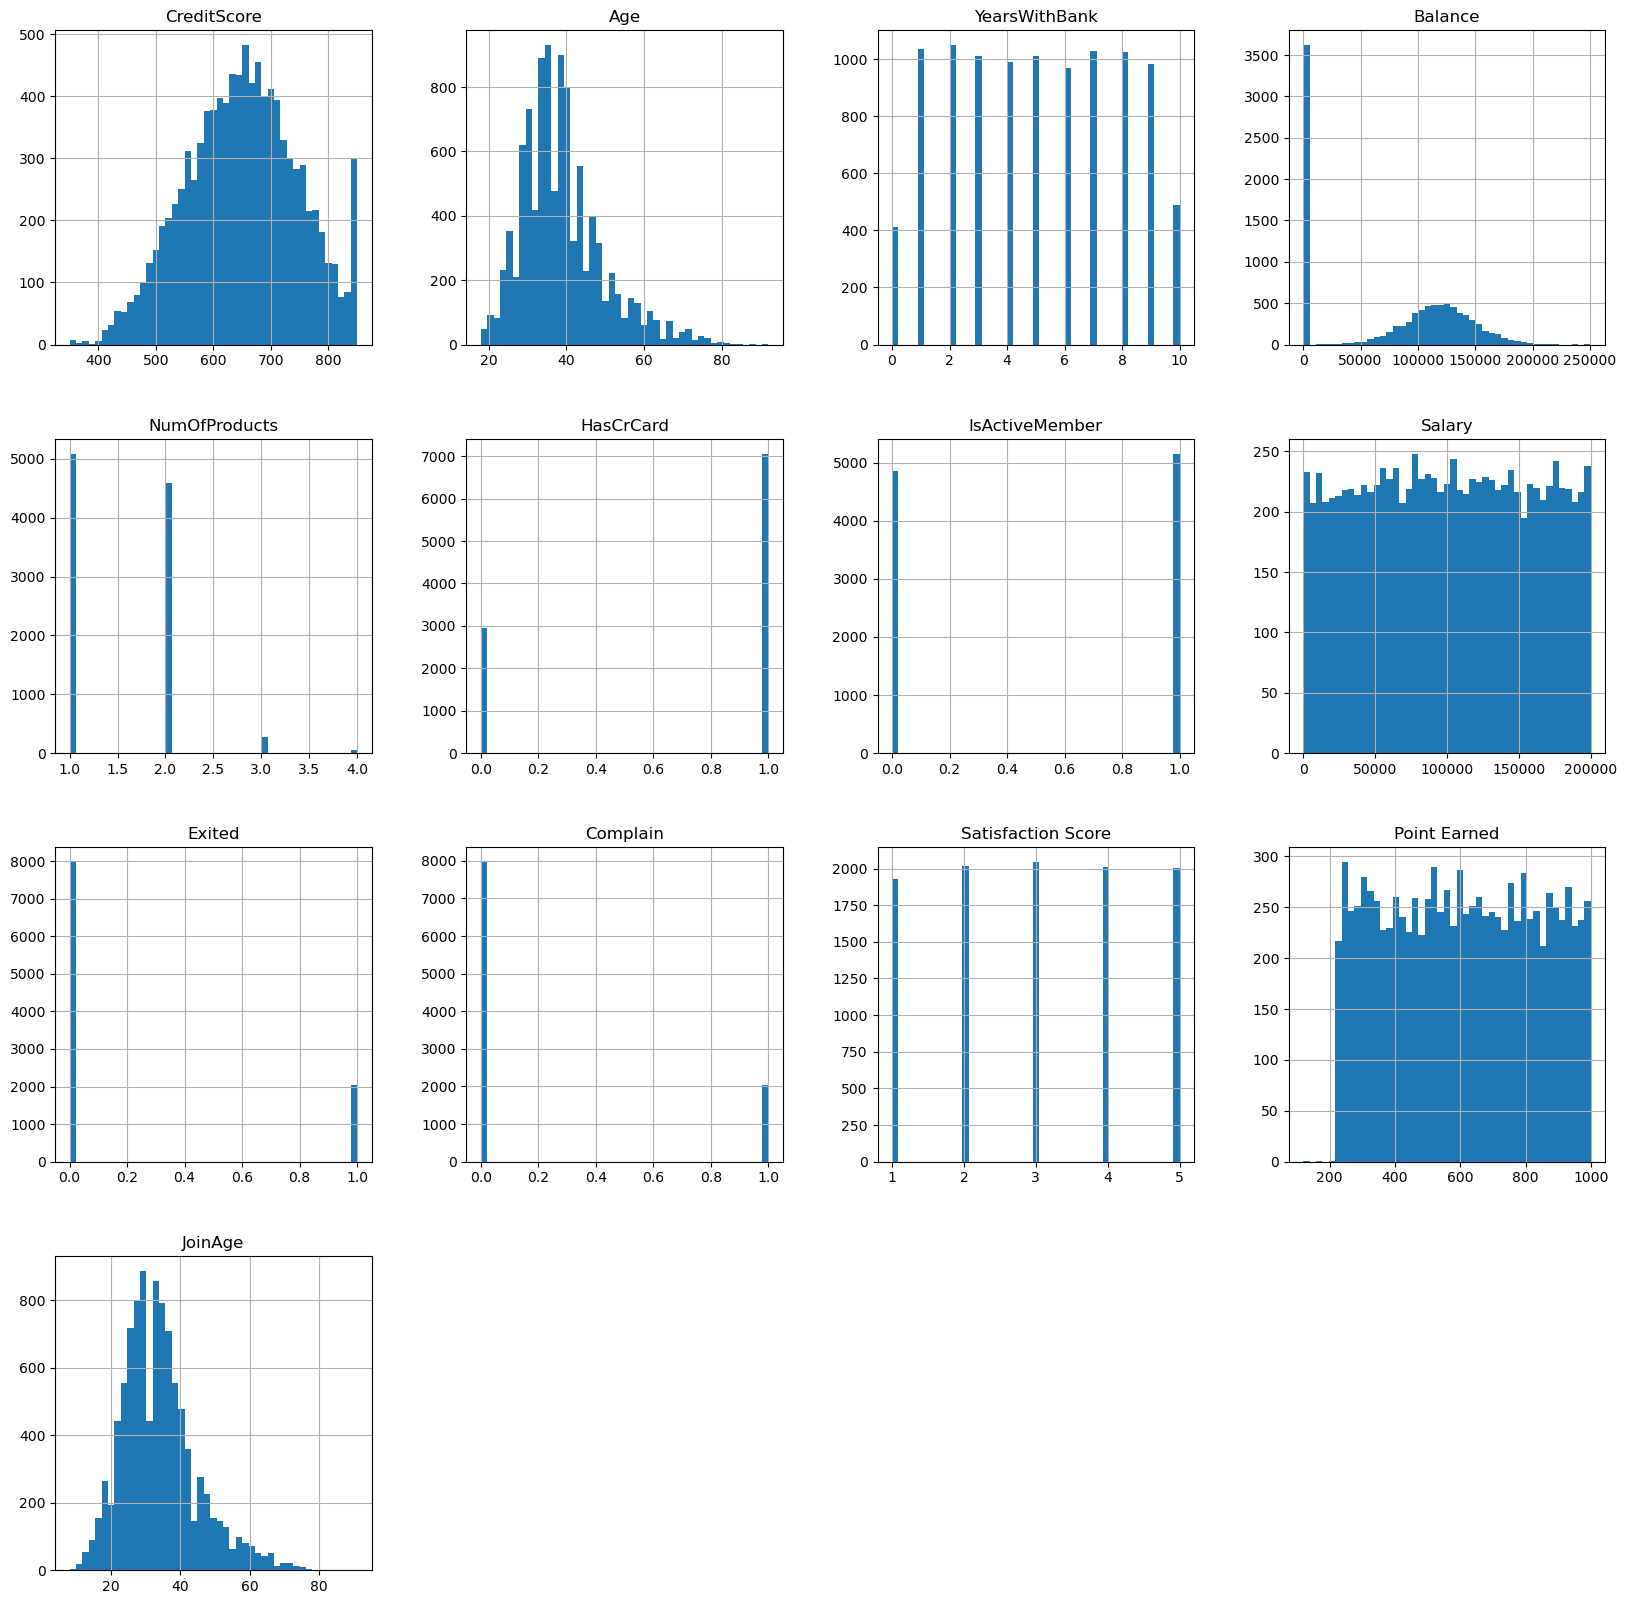

In [97]:
df1.hist(bins=45, figsize=(20,20));
# plt.show()

<Axes: xlabel='Point Earned', ylabel='Count'>

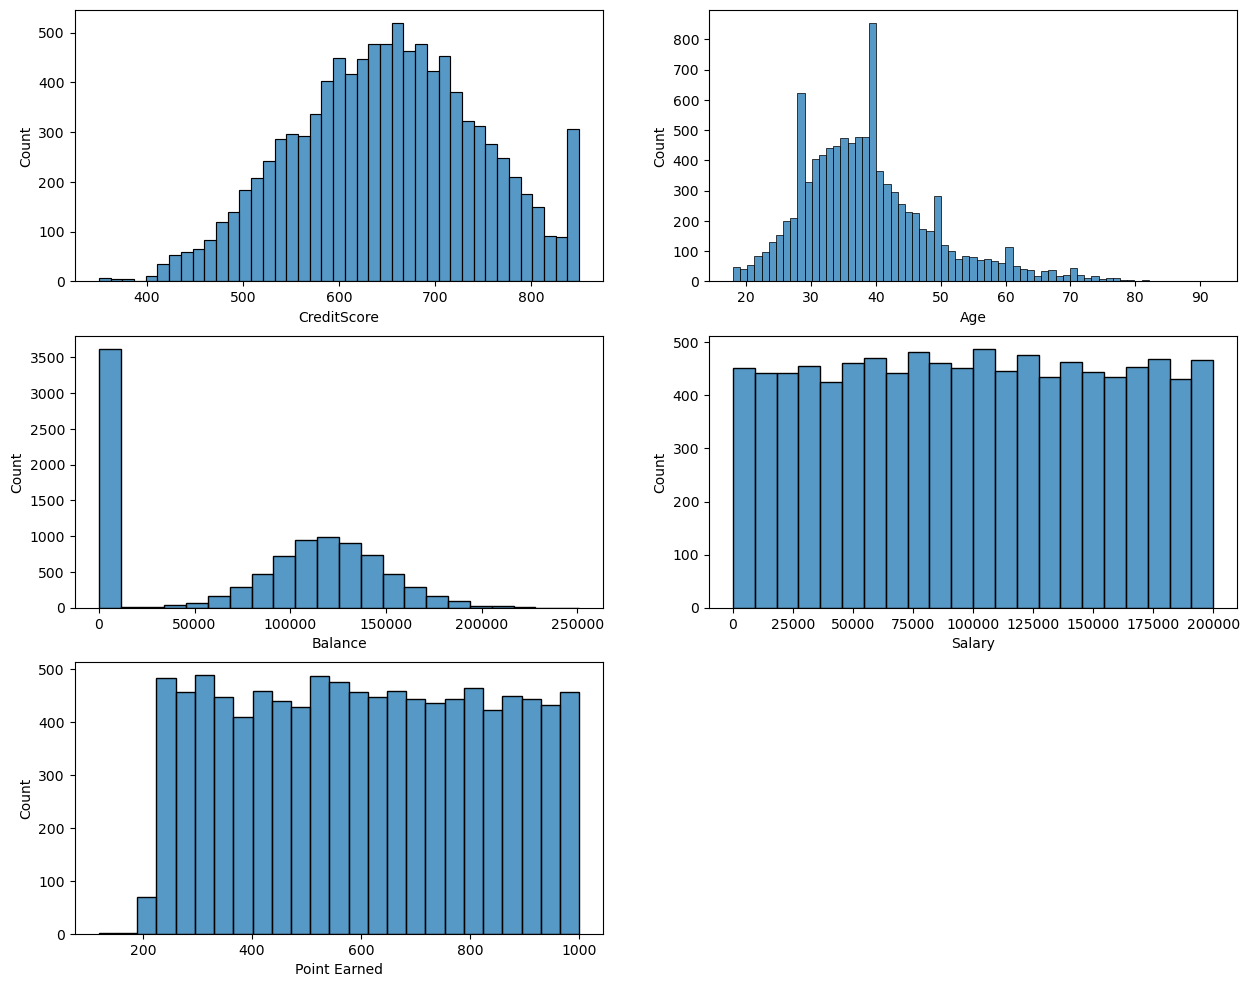

In [99]:
plt.figure(figsize = (15, 12))

plt.subplot(3, 2, 1)
sns.histplot(x = df1['CreditScore'], kde = False)

plt.subplot(3, 2, 2)
sns.histplot(x = df1['Age'], kde = False)

plt.subplot(3, 2, 3)
sns.histplot(x = df1['Balance'], kde = False)

plt.subplot(3, 2, 4)
sns.histplot(x = df1['Salary'], kde = False)

plt.subplot(3, 2, 5)
sns.histplot(x = df1['Point Earned'], kde = False)

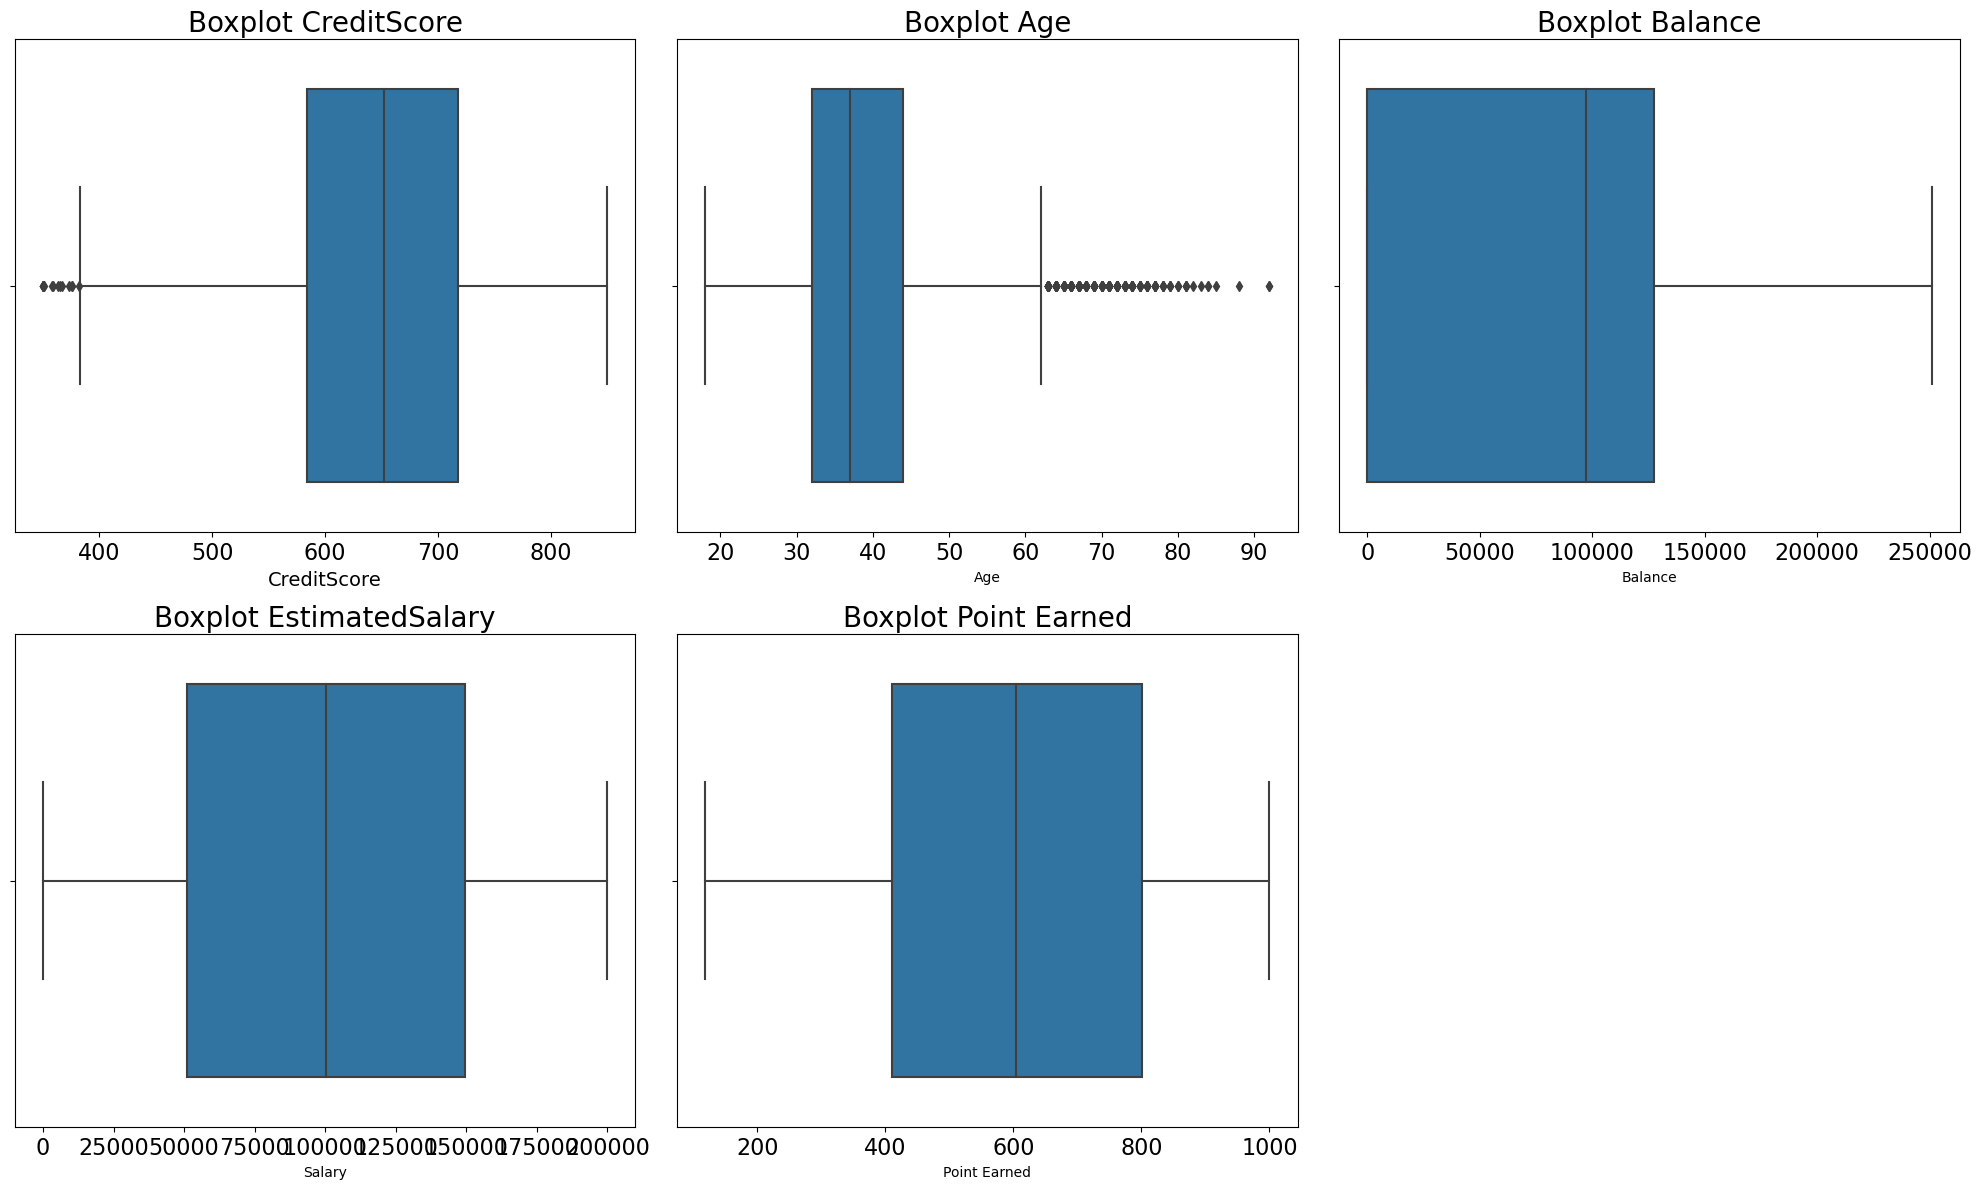

In [125]:
# Create a figure and set its size
plt.figure(figsize=(20, 12))

# Create the first subplot for the CreditScore boxplot
plt.subplot(2, 3, 1)  # 2 rows, 3 columns, subplot 1
plt.title("Boxplot CreditScore", fontdict={'fontsize': 20})
sns.boxplot(x=df1["CreditScore"])
plt.xlabel("CreditScore", fontsize=14)  # Increase font size of x-axis label
plt.tick_params(axis='x', labelsize=16)  # Increase font size of x-axis tick labels


# Create the second subplot for the Age boxplot
plt.subplot(2, 3, 2)  # 2 rows, 3 columns, subplot 2
plt.title("Boxplot Age", fontdict={'fontsize': 20})
sns.boxplot(x=df1["Age"])
plt.tick_params(axis='x', labelsize=16)  # Increase font size of x-axis tick labels

# Create the third subplot for the Balance boxplot
plt.subplot(2, 3, 3)  # 2 rows, 3 columns, subplot 3
plt.title("Boxplot Balance", fontdict={'fontsize': 20})
sns.boxplot(x=df1["Balance"])
plt.tick_params(axis='x', labelsize=16)  # Increase font size of x-axis tick labels

# Create the fourth subplot for the EstimatedSalary boxplot
plt.subplot(2, 3, 4)  # 2 rows, 3 columns, subplot 4
plt.title("Boxplot EstimatedSalary", fontdict={'fontsize': 20})
sns.boxplot(x=df1["Salary"])
plt.tick_params(axis='x', labelsize=16)  # Increase font size of x-axis tick labels

# Create the fifth subplot for the Point Earned boxplot
plt.subplot(2, 3, 5)  # 2 rows, 3 columns, subplot 5
plt.title("Boxplot Point Earned", fontdict={'fontsize': 20})
sns.boxplot(x=df1["Point Earned"])
plt.tick_params(axis='x', labelsize=16)  # Increase font size of x-axis tick labels

# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Display the plot
plt.show()